<a href="https://colab.research.google.com/github/Shreyabaral/SocialMediaAnalytics/blob/main/AdultIncomePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
!pip install ucimlrepo

In [65]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [99]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay,roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


In [67]:
import pandas as pd
# Combine features and targets into a single DataFrame
df = pd.concat([X, y], axis=1)

In [68]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [69]:
df.replace('?', np.nan, inplace=True)

In [70]:
df.isna().sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,2809
relationship,0
race,0
sex,0


In [71]:
df.duplicated().sum()

29

In [72]:
df.drop_duplicates(inplace=True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48813 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48813 non-null  int64 
 1   workclass       46014 non-null  object
 2   fnlwgt          48813 non-null  int64 
 3   education       48813 non-null  object
 4   education-num   48813 non-null  int64 
 5   marital-status  48813 non-null  object
 6   occupation      46004 non-null  object
 7   relationship    48813 non-null  object
 8   race            48813 non-null  object
 9   sex             48813 non-null  object
 10  capital-gain    48813 non-null  int64 
 11  capital-loss    48813 non-null  int64 
 12  hours-per-week  48813 non-null  int64 
 13  native-country  47957 non-null  object
 14  income          48813 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


Frequency-Based Imputation
Impute based on the probability of each class. For example, we could assign missing values to each category in proportion to its frequency.
Pros: Preserves the original distribution of workclass values.
Cons: Slightly more complex to implement but avoids bias from a single dominant class.

In [74]:
#imputation of null values in workclass

# Get distribution of workclass categories
workclass_distribution = df['workclass'].value_counts(normalize=True)

# Randomly sample based on the distribution
df['workclass'] = df['workclass'].apply(lambda x: np.random.choice(workclass_distribution.index, p=workclass_distribution.values) if pd.isnull(x) else x)

occupation_distribution = df['occupation'].value_counts(normalize=True)
df['occupation'] = df['occupation'].apply(lambda x: np.random.choice(occupation_distribution.index, p=occupation_distribution.values) if pd.isnull(x) else x)


In [75]:
#Mode Imputation for native_country
mode_value = df['native-country'].mode()[0]
df['native-country'].fillna(mode_value, inplace=True)

<ipython-input-75-d84512a608f9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['native-country'].fillna(mode_value, inplace=True)


In [76]:
df['income'].value_counts()

,count
income,
<=50K,24698
<=50K.,12430
>50K,7839
>50K.,3846


In [77]:
# Replace values for uniformity
df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.': '>=50K', '>50K': '>=50K'})


In [78]:
df['income'].value_counts() #Class Imbalance

,count
income,
<=50K,37128
>=50K,11685


In [79]:
# Map values as 0 and 1
df['income'] = df['income'].map({'<=50K': 1, '>=50K': 0})

**Outlier Detection**

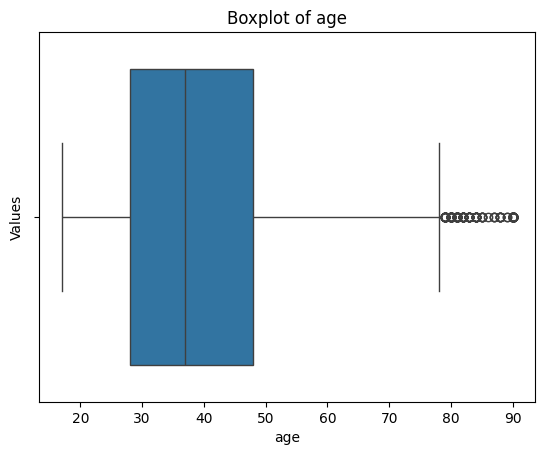

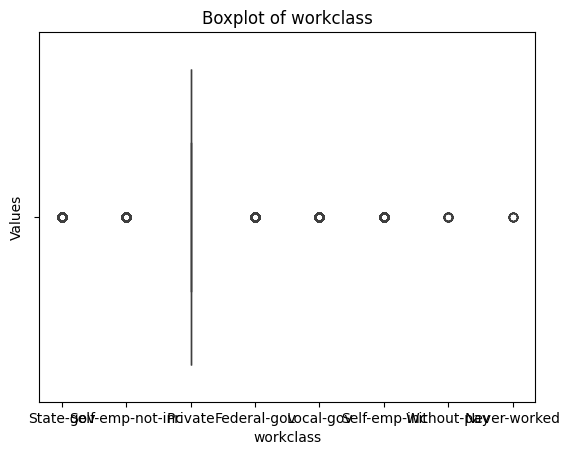

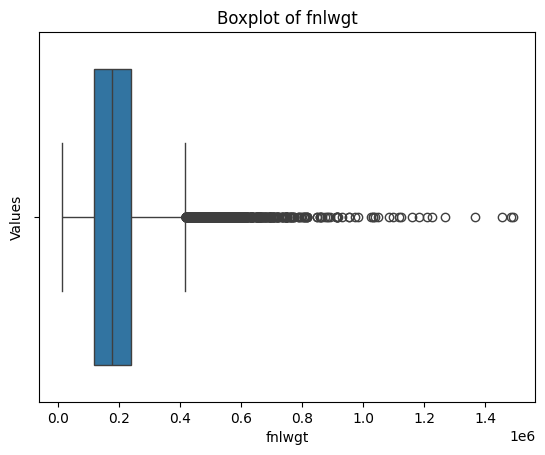

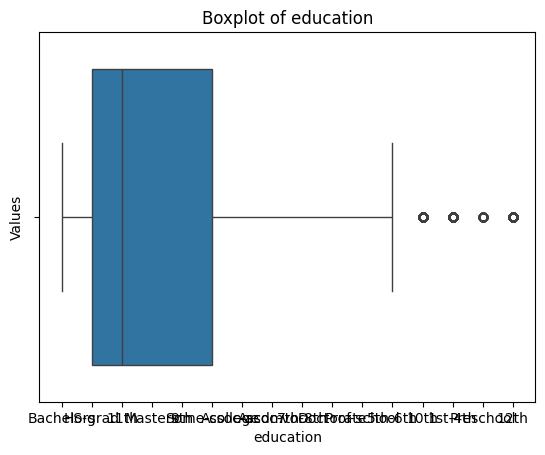

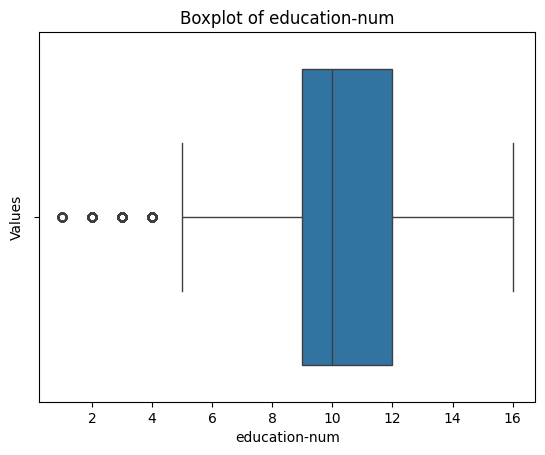

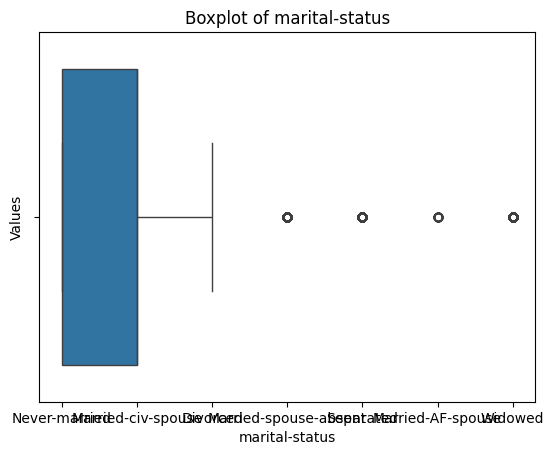

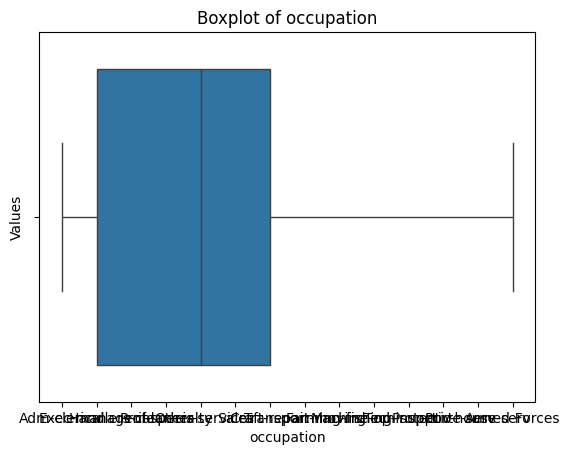

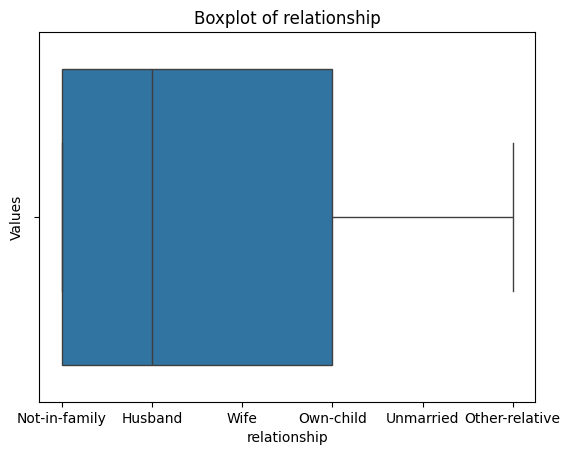

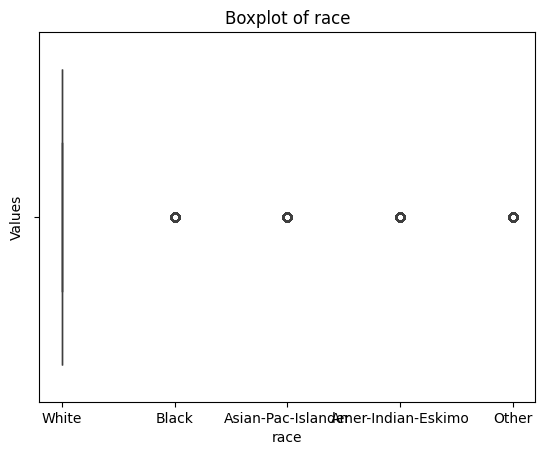

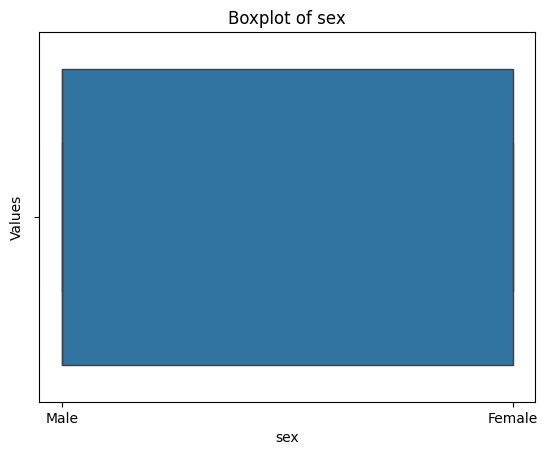

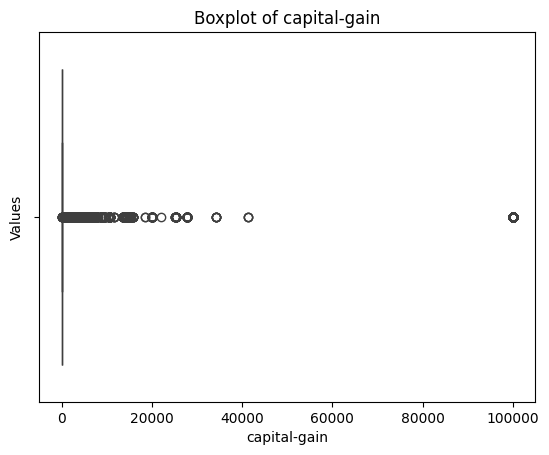

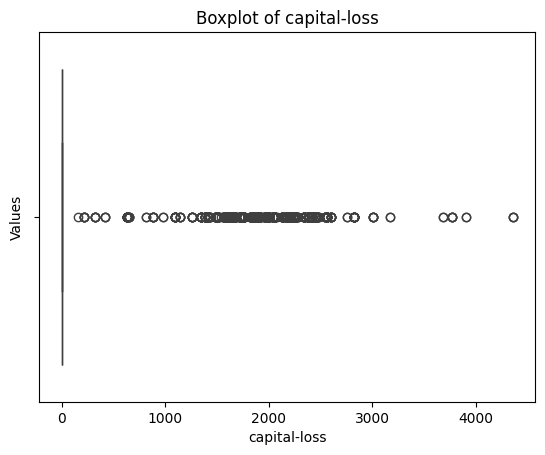

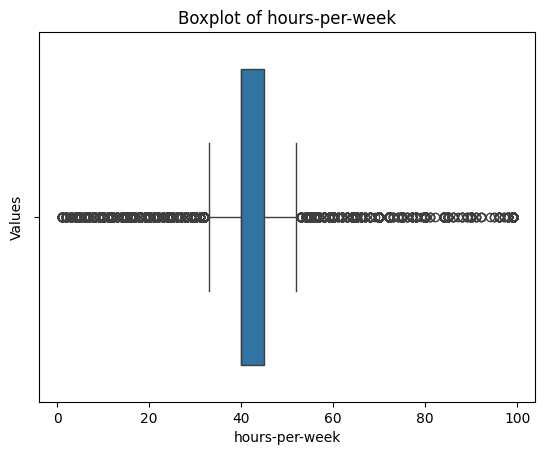

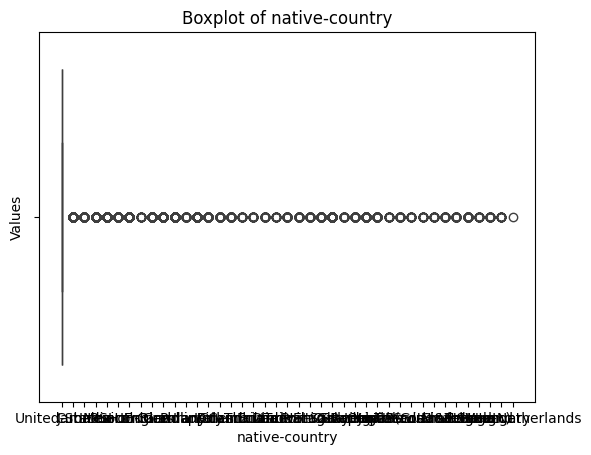

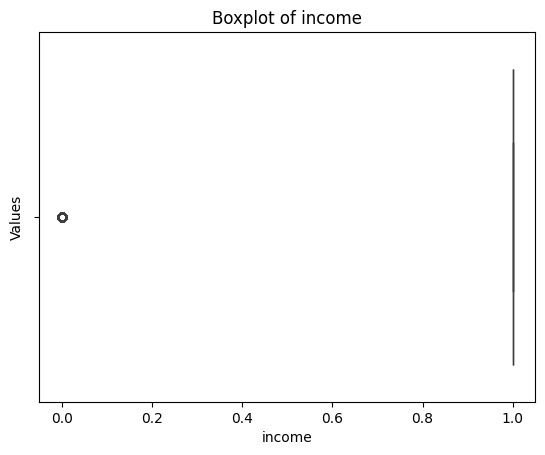

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.columns:
    plt.figure()
    fig=sns.boxplot(x=df[i])
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.ylabel('Values')
    plt.show()

**Encoding for object columns**

In [81]:
#select columns with object datatype
object_columns = df.select_dtypes(include=['object']).columns

# Initialize label encoder
label_encoder = LabelEncoder()


df['education'] = label_encoder.fit_transform(df['education'])
#mapping for sex column
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48813 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48813 non-null  int64 
 1   workclass       48813 non-null  object
 2   fnlwgt          48813 non-null  int64 
 3   education       48813 non-null  int64 
 4   education-num   48813 non-null  int64 
 5   marital-status  48813 non-null  object
 6   occupation      48813 non-null  object
 7   relationship    48813 non-null  object
 8   race            48813 non-null  object
 9   sex             48813 non-null  int64 
 10  capital-gain    48813 non-null  int64 
 11  capital-loss    48813 non-null  int64 
 12  hours-per-week  48813 non-null  int64 
 13  native-country  48813 non-null  object
 14  income          48813 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 6.0+ MB


In [83]:
one_hot_columns= ['workclass', 'marital-status', 'occupation',
       'relationship', 'race', 'native-country']

In [84]:
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)


In [85]:
# Features and target variable
X = df.drop('income', axis=1)  # Features
y = df['income']                # Target variable

[[2987  519]
 [2315 8823]]
              precision    recall  f1-score   support

           0       0.56      0.85      0.68      3506
           1       0.94      0.79      0.86     11138

    accuracy                           0.81     14644
   macro avg       0.75      0.82      0.77     14644
weighted avg       0.85      0.81      0.82     14644

Accuracy: 0.81


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [85]:
# Scale features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Performance Measure**

In [94]:
def display_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    disp = ConfusionMatrixDisplay(cm, display_labels=classes)
    disp.plot(xticks_rotation='vertical',cmap=plt.cm.Blues)
    plt.show()

In [95]:
def roc_auc_plot(y_test,y_pred,model):

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model}')
    plt.legend()
    plt.show()

In [96]:
def calculate_scores(model):
    pred_train = model.predict(X_train_scaled)
    pred_test = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    print("accuracy for Training Set:", round(accuracy_score(y_train, pred_train)*100,2), "\b%")
    print("Classification Report for Training Set:\n\n", classification_report(y_train, pred_train))
    display_confusion_matrix(y_train, pred_train, model.classes_)
    #roc_curve(y_train,pred_train)
    print()
    print("accuracy for Test Set:", round(accuracy_score(y_test, pred_test)*100,2), "\b%")
    print("Classification Report for Test Set:\n\n", classification_report(y_test, pred_test))
    display_confusion_matrix(y_test, pred_test, model.classes_)
    roc_auc_plot(y_test,y_pred_proba,model)

**Logistic Regression**

In [97]:
classifier= LogisticRegression(class_weight='balanced', random_state=42)
lr_model = classifier.fit(X_train_scaled, y_train)

accuracy for Training Set: 80.9 %
Classification Report for Training Set:

               precision    recall  f1-score   support

           0       0.57      0.85      0.68      8179
           1       0.94      0.80      0.86     25990

    accuracy                           0.81     34169
   macro avg       0.76      0.82      0.77     34169
weighted avg       0.85      0.81      0.82     34169



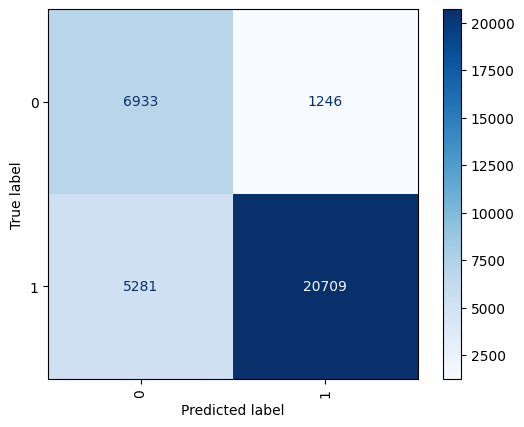


accuracy for Test Set: 80.65 %
Classification Report for Test Set:

               precision    recall  f1-score   support

           0       0.56      0.85      0.68      3506
           1       0.94      0.79      0.86     11138

    accuracy                           0.81     14644
   macro avg       0.75      0.82      0.77     14644
weighted avg       0.85      0.81      0.82     14644



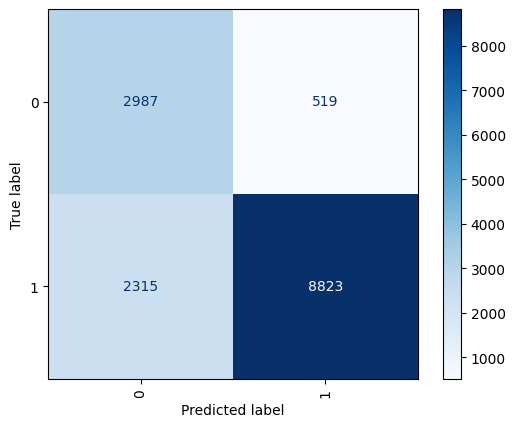

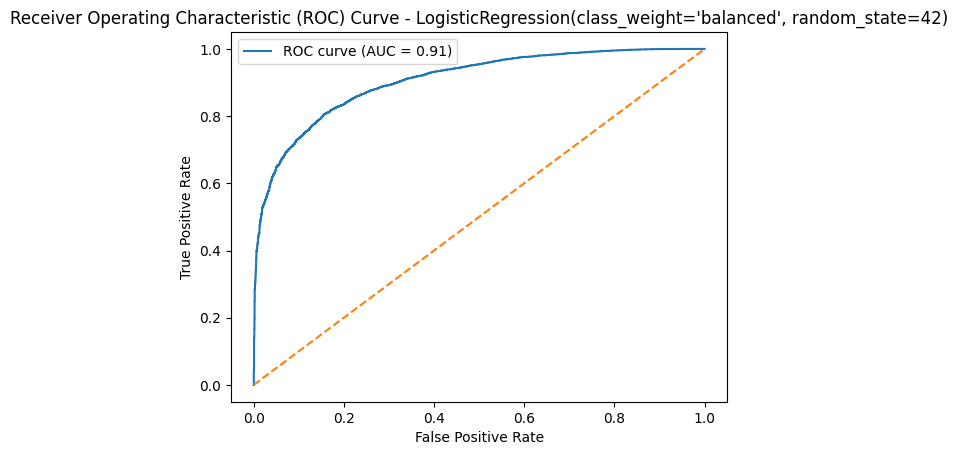

In [98]:
calculate_scores(lr_model)

**Random Forest Classifier**

accuracy for Training Set: 99.99 %
Classification Report for Training Set:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8179
           1       1.00      1.00      1.00     25990

    accuracy                           1.00     34169
   macro avg       1.00      1.00      1.00     34169
weighted avg       1.00      1.00      1.00     34169



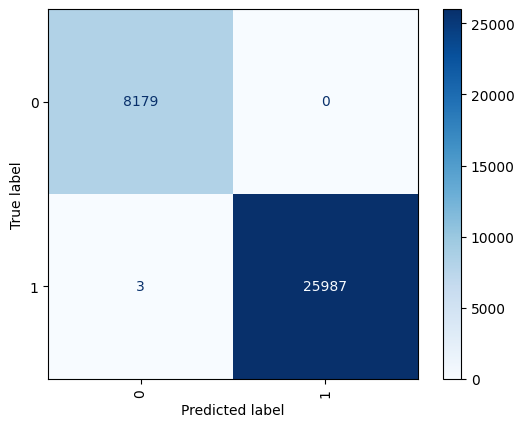


accuracy for Test Set: 85.67 %
Classification Report for Test Set:

               precision    recall  f1-score   support

           0       0.74      0.62      0.68      3506
           1       0.89      0.93      0.91     11138

    accuracy                           0.86     14644
   macro avg       0.81      0.78      0.79     14644
weighted avg       0.85      0.86      0.85     14644



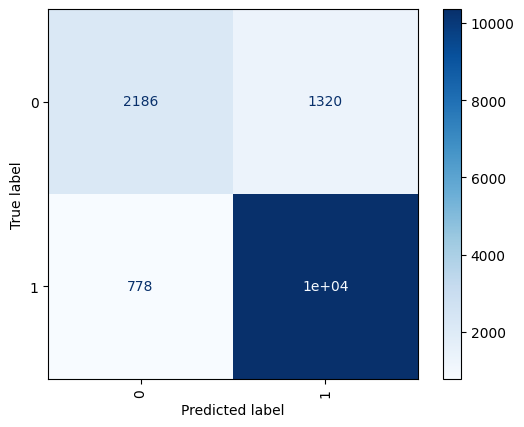

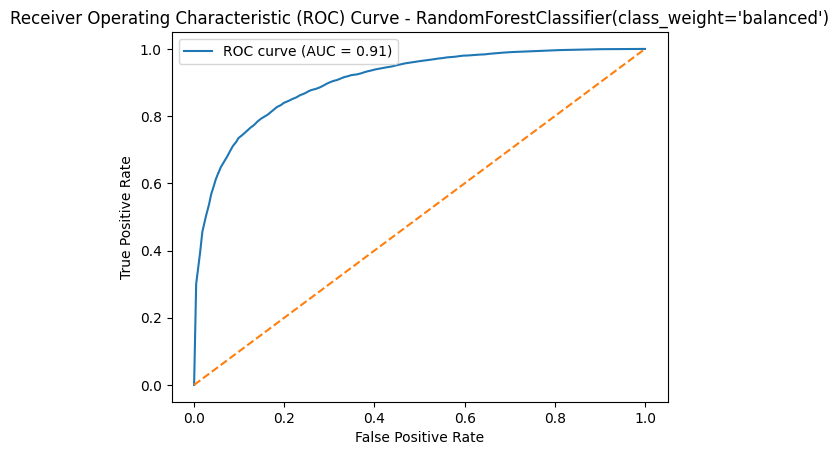

In [104]:
classifier= RandomForestClassifier(class_weight='balanced')
rfc_model = classifier.fit(X_train_scaled, y_train)
calculate_scores(rfc_model)

**Gradient Boosting Classifier**

accuracy for Training Set: 86.97 %
Classification Report for Training Set:

               precision    recall  f1-score   support

           0       0.80      0.61      0.69      8179
           1       0.89      0.95      0.92     25990

    accuracy                           0.87     34169
   macro avg       0.84      0.78      0.80     34169
weighted avg       0.86      0.87      0.86     34169



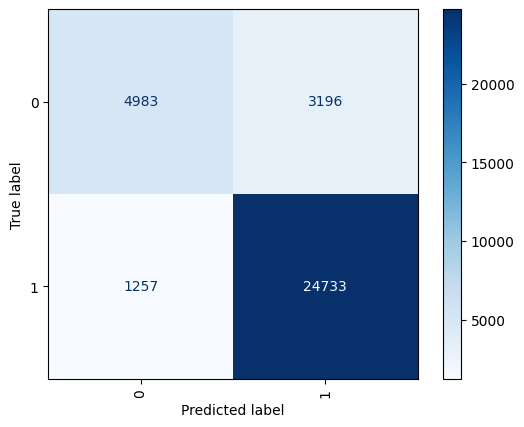


accuracy for Test Set: 86.7 %
Classification Report for Test Set:

               precision    recall  f1-score   support

           0       0.79      0.60      0.68      3506
           1       0.88      0.95      0.92     11138

    accuracy                           0.87     14644
   macro avg       0.84      0.78      0.80     14644
weighted avg       0.86      0.87      0.86     14644



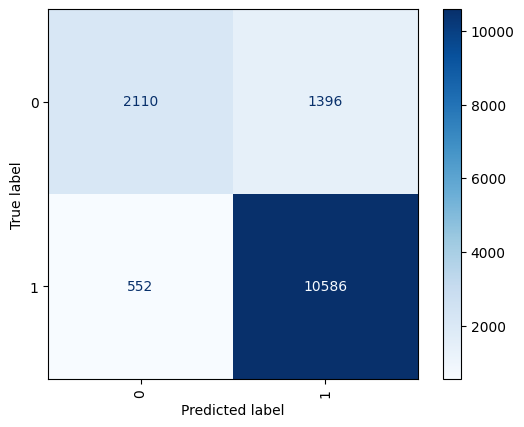

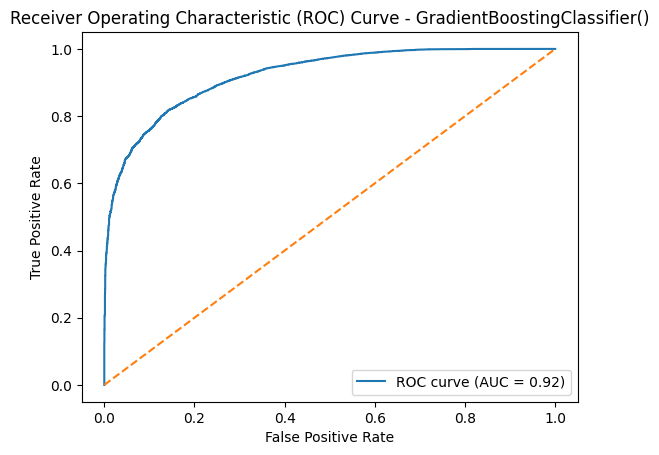

In [103]:
gb_classifier=GradientBoostingClassifier()
gb_model = gb_classifier.fit(X_train_scaled, y_train)
calculate_scores(gb_model)

Gradient Boosting performed well for the given dataset with training accuracy of 86.97 and testing accuracy of 86.7.